In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
evt_df = pd.read_csv('events_data.csv')

In [4]:
inj_df = pd.read_csv('injection_data.csv')

In [5]:
evt_df.dtypes

X              int64
Y              int64
Date/Time     object
Magnitude    float64
Cluster       object
dtype: object

In [6]:
evt_df['Date/Time'] = pd.to_datetime(evt_df['Date/Time'])

<AxesSubplot:ylabel='Cluster'>

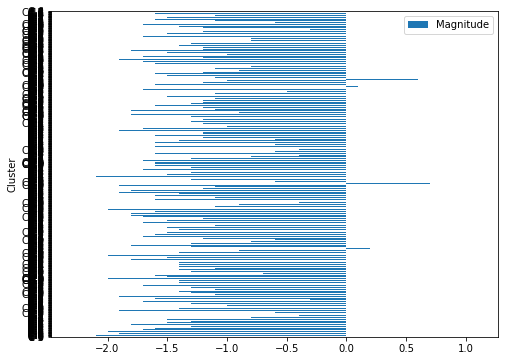

In [7]:
evt_df.plot.barh(x='Cluster',y='Magnitude',figsize=(8, 6))


In [8]:
inj_df['Time'] = pd.to_datetime(inj_df['Time'])

In [9]:
data = evt_df.groupby(['Cluster']).count()
data

,X,Y,Date/Time,Magnitude
Cluster,,,,
C-1,185,185,185,185
C-10,34,34,34,34
C-11,6,6,6,6
C-12,15,15,15,15
C-13,3,3,3,3
C-2,2,2,2,2
C-3,20,20,20,20
C-4,62,62,62,62
C-5,48,48,48,48


In [10]:
df = evt_df.groupby(['Cluster'])['Cluster'].count()
df= pd.DataFrame(dict(clusters=df.index, n_of_magnitude=df.values))
df

,clusters,n_of_magnitude
0,C-1,185
1,C-10,34
2,C-11,6
3,C-12,15
4,C-13,3
5,C-2,2
6,C-3,20
7,C-4,62
8,C-5,48
9,C-6,220


# no of seismic activities for each cluster

<AxesSubplot:xlabel='clusters'>

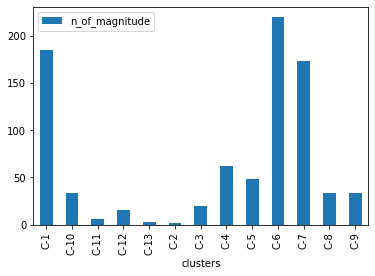

In [11]:
df.plot(x='clusters',y='n_of_magnitude',kind='bar')

In [11]:
evt_df.dtypes

X                     int64
Y                     int64
Date/Time    datetime64[ns]
Magnitude           float64
Cluster              object
dtype: object

In [12]:
evt_df['ext_date'] = [d.date() for d in evt_df['Date/Time']]
evt_df['ext_time'] = [d.time() for d in evt_df['Date/Time']]

In [13]:
evt_df

,X,Y,Date/Time,Magnitude,Cluster,ext_date,ext_time
0,8009,104070,2017-09-05 01:27:55,-2.1,C-5,2017-09-05,01:27:55
1,7728,104155,2017-09-25 16:38:05,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,2017-10-02 09:48:26,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,2017-10-07 13:32:06,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,2017-10-08 05:23:34,-2.1,C-6,2017-10-08,05:23:34
...,...,...,...,...,...,...,...
832,9244,103167,2018-07-12 11:42:46,-1.2,C-3,2018-07-12,11:42:46
833,7782,105367,2018-07-13 01:06:40,-1.2,C-7,2018-07-13,01:06:40
834,9760,103680,2018-07-13 11:19:25,-0.9,C-12,2018-07-13,11:19:25
835,7400,104520,2018-07-13 21:38:37,-1.4,C-6,2018-07-13,21:38:37


In [14]:
inj_df.isna().sum()

Time                          0
Drill Centre                  0
Well_Name                     0
BHP.kPag                     18
BHT.degC                     18
CO2 Injection Rate (kg/s)    42
Cumm Inj (Tonnes)             0
dtype: int64

<AxesSubplot:xlabel='Magnitude', ylabel='count'>

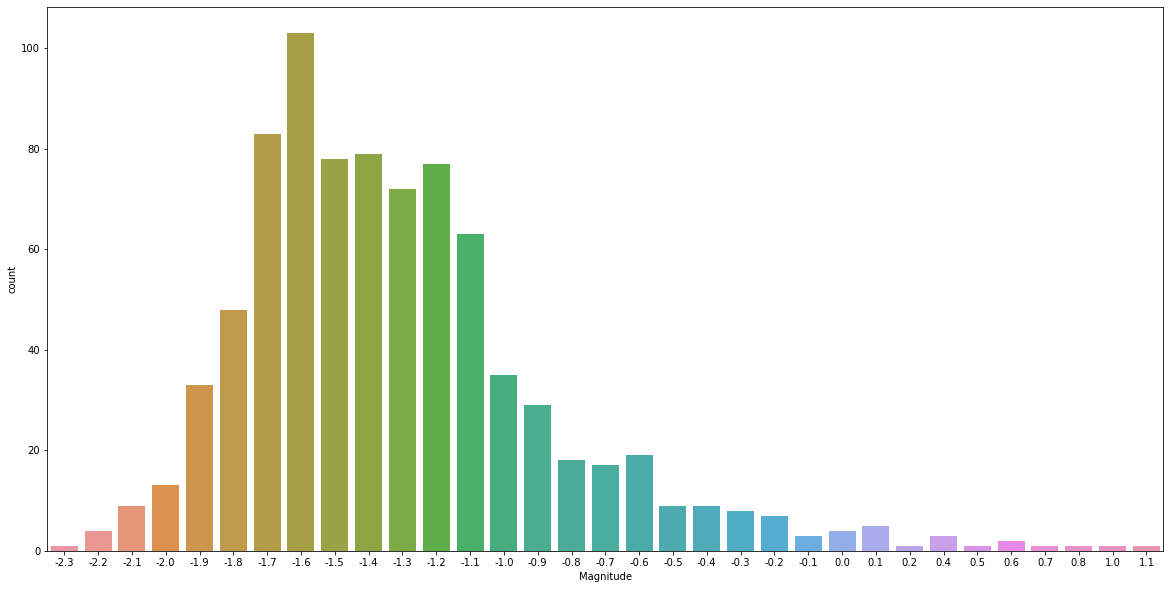

In [15]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(x=evt_df['Magnitude'])

In [19]:
inj_df

,Time,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes),inj_date,inj_time
0,2017-01-01 00:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,00:00:00
1,2017-01-01 01:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,01:00:00
2,2017-01-01 02:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,02:00:00
3,2017-01-01 03:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,03:00:00
4,2017-01-01 04:00:00,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...
121567,2018-07-17 19:00:00,C,W7,22126.82543,82.695480,11.144886,316067.1780,2018-07-17,19:00:00
121568,2018-07-17 19:00:00,C,W8,22137.77480,81.950245,11.133177,268214.0177,2018-07-17,19:00:00
121569,2018-07-17 19:00:00,C,W9,0.00000,0.000000,11.518527,311460.8912,2018-07-17,19:00:00
121570,2018-07-17 19:00:00,A,W1,22652.26241,90.776559,0.000000,356529.1229,2018-07-17,19:00:00


In [18]:
inj_df['inj_date'] = [d.date() for d in inj_df['Time']]
inj_df['inj_time'] = [d.time() for d in inj_df['Time']]

In [20]:
evt_df.drop(['Date/Time'], axis = 1, inplace=True)

In [21]:
evt_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
0,8009,104070,-2.1,C-5,2017-09-05,01:27:55
1,7728,104155,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,-2.1,C-6,2017-10-08,05:23:34
...,...,...,...,...,...,...
832,9244,103167,-1.2,C-3,2018-07-12,11:42:46
833,7782,105367,-1.2,C-7,2018-07-13,01:06:40
834,9760,103680,-0.9,C-12,2018-07-13,11:19:25
835,7400,104520,-1.4,C-6,2018-07-13,21:38:37


In [22]:
inj_df.drop(['Time'], axis = 1, inplace=True)

In [23]:
inj_df

,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes),inj_date,inj_time
0,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,00:00:00
1,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,01:00:00
2,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,02:00:00
3,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,03:00:00
4,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...
121567,C,W7,22126.82543,82.695480,11.144886,316067.1780,2018-07-17,19:00:00
121568,C,W8,22137.77480,81.950245,11.133177,268214.0177,2018-07-17,19:00:00
121569,C,W9,0.00000,0.000000,11.518527,311460.8912,2018-07-17,19:00:00
121570,A,W1,22652.26241,90.776559,0.000000,356529.1229,2018-07-17,19:00:00


In [24]:
evt_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
0,8009,104070,-2.1,C-5,2017-09-05,01:27:55
1,7728,104155,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,-2.1,C-6,2017-10-08,05:23:34
...,...,...,...,...,...,...
832,9244,103167,-1.2,C-3,2018-07-12,11:42:46
833,7782,105367,-1.2,C-7,2018-07-13,01:06:40
834,9760,103680,-0.9,C-12,2018-07-13,11:19:25
835,7400,104520,-1.4,C-6,2018-07-13,21:38:37


In [25]:
evt_df.isna().sum()

X            0
Y            0
Magnitude    0
Cluster      0
ext_date     0
ext_time     0
dtype: int64

In [26]:
inj_df.isna().sum()

Drill Centre                  0
Well_Name                     0
BHP.kPag                     18
BHT.degC                     18
CO2 Injection Rate (kg/s)    42
Cumm Inj (Tonnes)             0
inj_date                      0
inj_time                      0
dtype: int64

In [27]:
inj_df.shape

(121572, 8)

In [28]:
inj_df.dropna()

,Drill Centre,Well_Name,BHP.kPag,BHT.degC,CO2 Injection Rate (kg/s),Cumm Inj (Tonnes),inj_date,inj_time
0,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,00:00:00
1,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,01:00:00
2,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,02:00:00
3,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,03:00:00
4,A,W1,0.00000,214.000000,0.000000,0.0000,2017-01-01,04:00:00
...,...,...,...,...,...,...,...,...
121567,C,W7,22126.82543,82.695480,11.144886,316067.1780,2018-07-17,19:00:00
121568,C,W8,22137.77480,81.950245,11.133177,268214.0177,2018-07-17,19:00:00
121569,C,W9,0.00000,0.000000,11.518527,311460.8912,2018-07-17,19:00:00
121570,A,W1,22652.26241,90.776559,0.000000,356529.1229,2018-07-17,19:00:00


In [31]:
inj_df.shape

(121554, 8)

In [30]:
inj_df.dropna(subset=['BHP.kPag'], inplace=True)

In [32]:
inj_df.isna().sum()

Drill Centre                  0
Well_Name                     0
BHP.kPag                      0
BHT.degC                      0
CO2 Injection Rate (kg/s)    42
Cumm Inj (Tonnes)             0
inj_date                      0
inj_time                      0
dtype: int64

In [40]:
topclus_df = evt_df.groupby('Cluster').filter(lambda group: group.size > 150)
topclus_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
0,8009,104070,-2.1,C-5,2017-09-05,01:27:55
1,7728,104155,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,-2.1,C-6,2017-10-08,05:23:34
...,...,...,...,...,...,...
830,6640,104520,-0.6,C-6,2018-07-11,12:32:54
831,6520,104720,-0.9,C-6,2018-07-12,07:31:54
833,7782,105367,-1.2,C-7,2018-07-13,01:06:40
835,7400,104520,-1.4,C-6,2018-07-13,21:38:37


<AxesSubplot:xlabel='Magnitude', ylabel='count'>

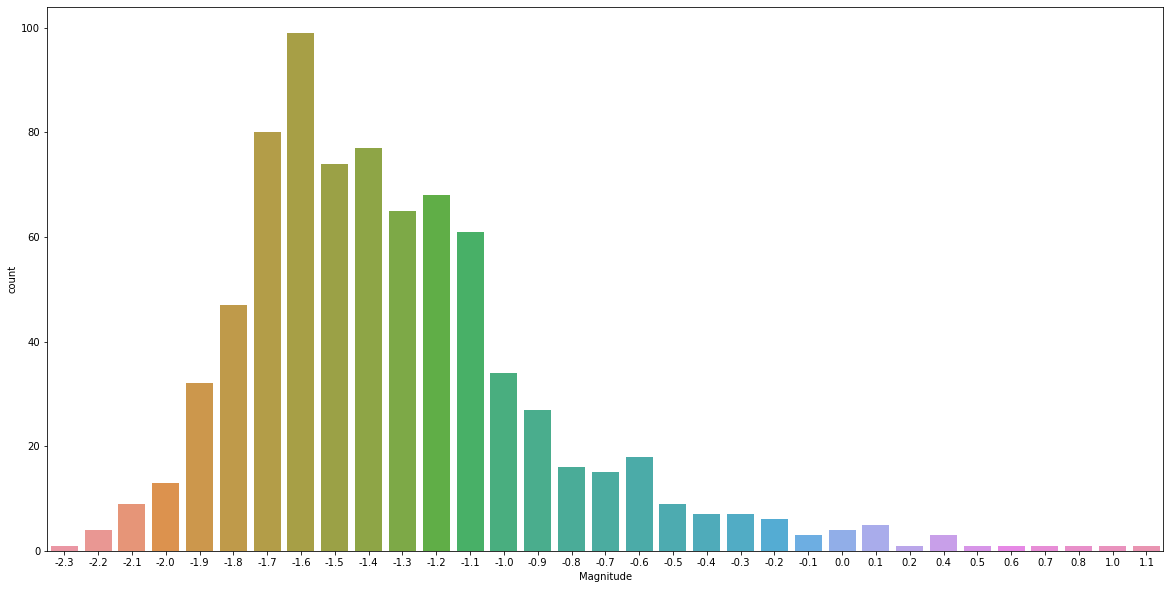

In [42]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(x=topclus_df[''])

In [45]:
topmag_df = evt_df.groupby(['Magnitude']).count()
topmag_df

,X,Y,Cluster,ext_date,ext_time
Magnitude,,,,,
-2.3,1,1,1,1,1
-2.2,4,4,4,4,4
-2.1,9,9,9,9,9
-2.0,13,13,13,13,13
-1.9,33,33,33,33,33
-1.8,48,48,48,48,48
-1.7,83,83,83,83,83
-1.6,103,103,103,103,103
-1.5,78,78,78,78,78


In [57]:
c6_df = evt_df[evt_df['Cluster'].isin(['C-6'])]

In [58]:
c6_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
1,7728,104155,-1.4,C-6,2017-09-25,16:38:05
2,6712,104286,-1.6,C-6,2017-10-02,09:48:26
3,7649,104192,-2.1,C-6,2017-10-07,13:32:06
4,7683,104270,-2.1,C-6,2017-10-08,05:23:34
5,7635,104330,-1.8,C-6,2017-10-08,16:21:22
...,...,...,...,...,...,...
829,7400,104600,-1.6,C-6,2018-07-11,11:28:08
830,6640,104520,-0.6,C-6,2018-07-11,12:32:54
831,6520,104720,-0.9,C-6,2018-07-12,07:31:54
835,7400,104520,-1.4,C-6,2018-07-13,21:38:37


In [62]:
df = c6_df.groupby(['Magnitude'])['Magnitude'].count()
df

Magnitude
-2.2     1
-2.1     3
-2.0     5
-1.9     7
-1.8    13
-1.7    18
-1.6    23
-1.5    25
-1.4    30
-1.3    20
-1.2    12
-1.1    21
-1.0    10
-0.9    13
-0.8     3
-0.7     4
-0.6     2
-0.4     1
-0.3     1
 0.1     2
 0.4     1
 0.6     1
 0.7     1
 0.8     1
 1.0     1
 1.1     1
Name: Magnitude, dtype: int64

<AxesSubplot:xlabel='Magnitude', ylabel='count'>

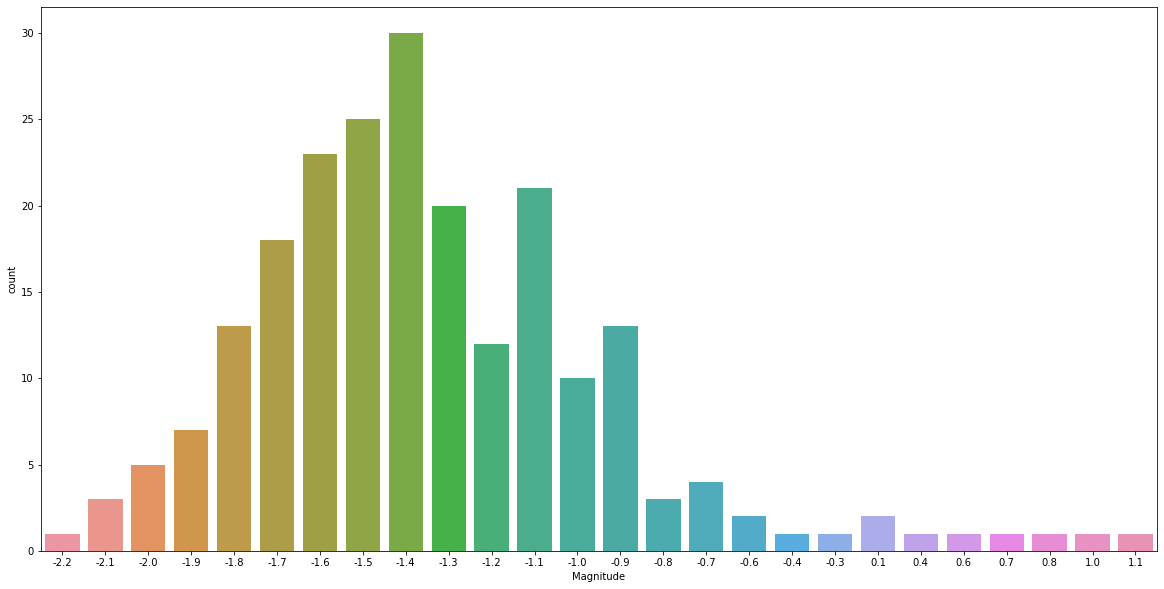

In [60]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(x=c6_df['Magnitude'])

In [64]:
c1_df = evt_df[evt_df['Cluster'].isin(['C-1'])]
c1_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
28,8651,104911,-1.8,C-1,2017-11-20,01:21:48
29,8719,104866,-1.7,C-1,2017-11-20,07:16:06
55,8104,104923,-1.6,C-1,2017-12-27,09:35:02
58,8309,104730,-1.8,C-1,2017-12-28,18:26:26
59,8211,104809,-1.8,C-1,2017-12-28,22:23:43
...,...,...,...,...,...,...
794,8200,104640,-1.8,C-1,2018-07-01,22:34:30
804,8135,104700,-1.7,C-1,2018-07-04,03:02:25
810,8512,104721,-1.5,C-1,2018-07-06,19:20:53
819,8320,104720,-1.5,C-1,2018-07-08,23:06:10


In [65]:
df = c1_df.groupby(['Magnitude'])['Magnitude'].count()
df

Magnitude
-1.9     6
-1.8    18
-1.7    39
-1.6    48
-1.5    34
-1.4    20
-1.3     9
-1.2     3
-1.1     2
-1.0     5
-0.9     1
Name: Magnitude, dtype: int64

<AxesSubplot:xlabel='Magnitude', ylabel='count'>

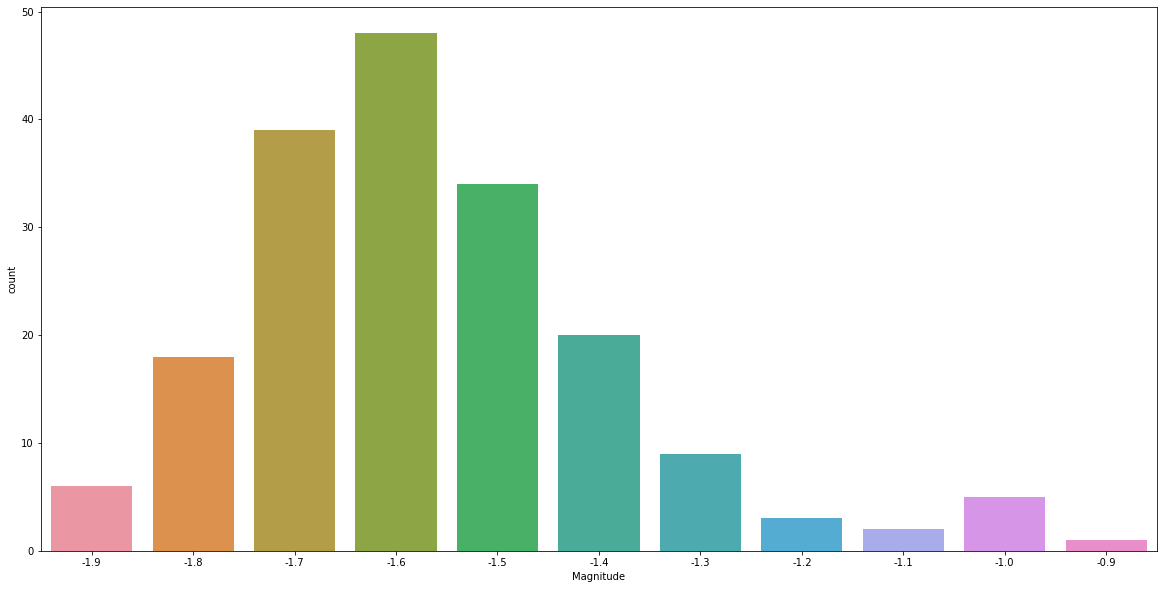

In [66]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(x=c1_df['Magnitude'])

In [67]:
c7_df = evt_df[evt_df['Cluster'].isin(['C-7'])]
c7_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
10,9039,105278,-1.2,C-7,2017-10-27,08:51:42
22,9247,105374,-1.1,C-7,2017-11-11,15:57:36
25,7838,105451,-1.2,C-7,2017-11-18,07:08:42
26,7789,105562,-1.3,C-7,2017-11-18,07:08:43
30,8495,105326,-1.4,C-7,2017-11-24,14:21:52
...,...,...,...,...,...,...
822,8349,105033,-1.5,C-7,2018-07-10,02:43:00
823,9488,105416,-1.4,C-7,2018-07-10,14:29:54
824,9066,105346,-1.1,C-7,2018-07-10,21:05:08
827,6360,105400,-0.7,C-7,2018-07-11,10:37:33


In [70]:
df = c7_df.groupby(['Magnitude'])['Magnitude'].count()
df

Magnitude
-1.9     2
-1.7     2
-1.6     4
-1.5     8
-1.4    20
-1.3    28
-1.2    43
-1.1    34
-1.0    14
-0.9     7
-0.8     5
-0.7     3
-0.6     1
-0.4     2
-0.1     1
Name: Magnitude, dtype: int64

<AxesSubplot:xlabel='Magnitude', ylabel='count'>

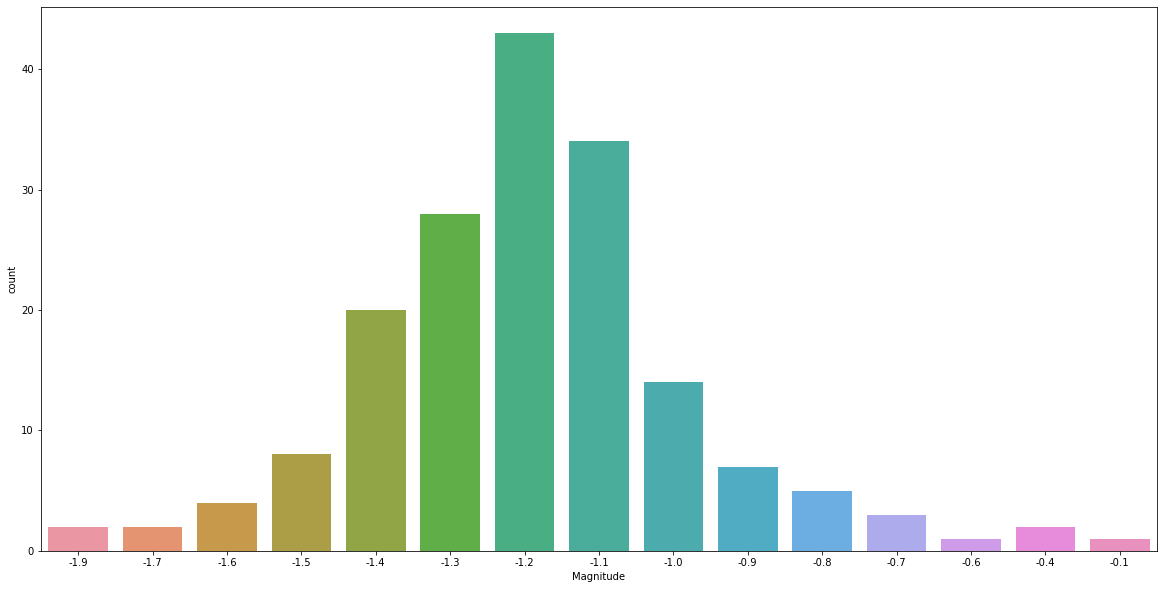

In [69]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(x=c7_df['Magnitude'])

In [71]:
c4_df = evt_df[evt_df['Cluster'].isin(['C-4'])]
c4_df

,X,Y,Magnitude,Cluster,ext_date,ext_time
12,7842,104346,-2.2,C-4,2017-11-01,15:55:49
15,7804,104289,-2.1,C-4,2017-11-02,11:00:43
50,7840,104300,-2.0,C-4,2017-12-19,10:47:13
132,8053,104664,-1.7,C-4,2018-01-29,04:54:37
140,7920,104340,-1.9,C-4,2018-02-04,09:51:08
...,...,...,...,...,...,...
746,7840,104520,-1.6,C-4,2018-06-19,19:41:50
748,7840,104360,-2.1,C-4,2018-06-20,08:07:04
749,7960,104550,-1.9,C-4,2018-06-20,17:18:06
755,7891,104294,-1.9,C-4,2018-06-21,05:17:06


In [72]:
df = c4_df.groupby(['Magnitude'])['Magnitude'].count()
df

Magnitude
-2.2     1
-2.1     2
-2.0     6
-1.9     8
-1.8     4
-1.7    14
-1.6    20
-1.5     4
-1.4     2
-1.3     1
Name: Magnitude, dtype: int64

<AxesSubplot:xlabel='Magnitude', ylabel='count'>

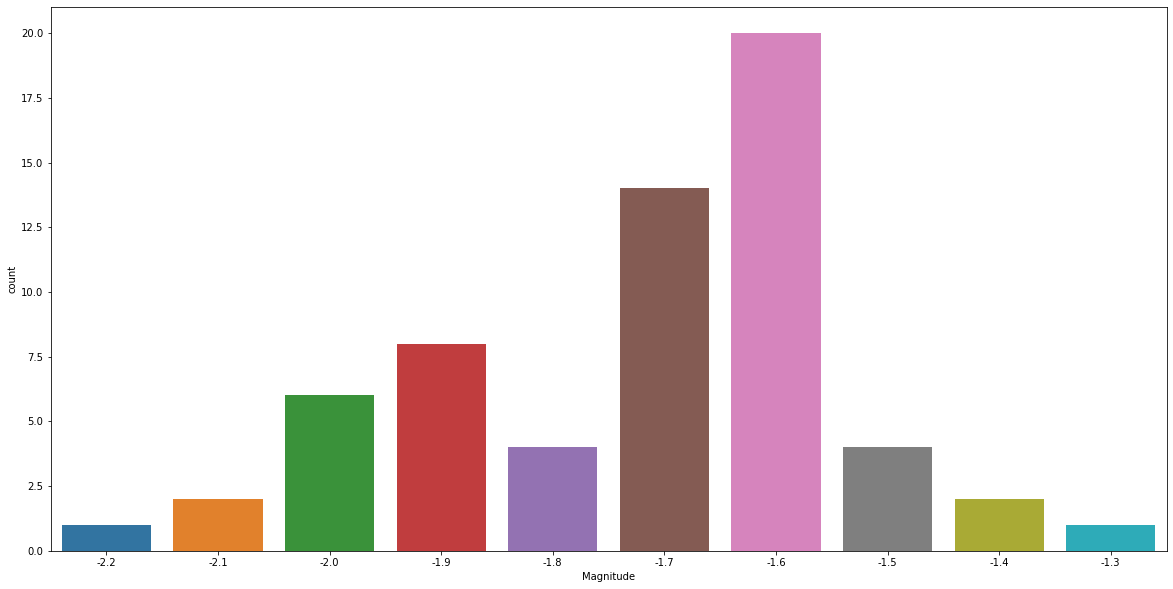

In [73]:
plt.rcParams['figure.figsize'] = (20,10)
sns.countplot(x=c4_df['Magnitude'])

In [ ]:
df.plot(x='clusters',y='n_of_magnitude',kind='bar')

In [15]:
evt_df

,X,Y,Date/Time,Magnitude,Cluster
0,8009,104070,2017-09-05 01:27:55,-2.1,C-5
1,7728,104155,2017-09-25 16:38:05,-1.4,C-6
2,6712,104286,2017-10-02 09:48:26,-1.6,C-6
3,7649,104192,2017-10-07 13:32:06,-2.1,C-6
4,7683,104270,2017-10-08 05:23:34,-2.1,C-6
...,...,...,...,...,...
832,9244,103167,2018-07-12 11:42:46,-1.2,C-3
833,7782,105367,2018-07-13 01:06:40,-1.2,C-7
834,9760,103680,2018-07-13 11:19:25,-0.9,C-12
835,7400,104520,2018-07-13 21:38:37,-1.4,C-6


In [ ]:
df = evt_df.groupby(['Cluster'])['Cluster'].count()
df= pd.DataFrame(dict(clusters=df.index, n_of_magnitude=df.values))
df